In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

In [5]:
np.random.seed(500)

In [6]:
df=pd.read_csv('root2aiData.csv')  # loading the csv file into dataframe.

In [7]:
df.head(10)

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
5,agarwal head bank,Blockchain
6,several data security regulatory oversight wou...,Blockchain
7,relevance transaction register available publi...,Blockchain
8,technology need transaction intermediary clear...,Blockchain
9,seven bank morgan chase already support certai...,Blockchain


In [8]:
df.shape

(22704, 2)

In [9]:
df.isnull().sum()

Text      3
Target    0
dtype: int64

There are only 3 values missing out of 22704. Hence, we will drop those three values. 

In [10]:
df.dropna(how='any',inplace=True)  

In [11]:
df.isnull().sum()

Text      0
Target    0
dtype: int64

In [12]:
df['Target'].unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

There are total total 11 different categories in which our text topic is divided. i.e. 11 different classes.

#### Stemming

In [13]:
from nltk.stem.snowball import SnowballStemmer

In [14]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

In [15]:
# Split the sentences to lists of words.
df['Text'] = df['Text'].str.split()

In [16]:
df['Text'] = df['Text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [17]:
df['Text']

0        [reserv, bank, form, expert, committe, base, i...
1           [director, could, play, role, financi, system]
2        [preliminari, discuss, secur, transact, studi,...
3        [secur, inde, prove, essenti, transform, finan...
4        [bank, settlement, normal, take, three, day, b...
                               ...                        
22699    [fourth, studi, discuss, blockchain, technolog...
22700    [book, finish, state, biggest, issu, emerg, fo...
22701                                [peopl, cultur, cess]
22702    [author, challeng, execu, tive, lead, chang, s...
22703    [chang, data, driven, cultur, come, bottom, mu...
Name: Text, Length: 22701, dtype: object

In [18]:
#Join list of words into sentences.
df['Text']=df['Text'].str.join(" ")

In [19]:
df['Text']

0        reserv bank form expert committe base institut...
1                  director could play role financi system
2        preliminari discuss secur transact studi resea...
3        secur inde prove essenti transform financi sys...
4        bank settlement normal take three day base pay...
                               ...                        
22699    fourth studi discuss blockchain technolog enab...
22700    book finish state biggest issu emerg fourth in...
22701                                    peopl cultur cess
22702    author challeng execu tive lead chang stop ask...
22703      chang data driven cultur come bottom must start
Name: Text, Length: 22701, dtype: object

In [20]:
#Dividing data into independent(X) and dependent(y) features.
X=df['Text']
y=df['Target']

#### Division of data 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#splitting both independent and dependent features into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=np.random)

In [23]:
print('Unique output variable -  {}'.format(len(y.unique())))
print('No. of samples in training data - {}'.format(len(X_train)))
print('No. of samples in test data - {}'.format(len(X_test)))

Unique output variable -  11
No. of samples in training data - 15890
No. of samples in test data - 6811


In [24]:
y_train.value_counts()

FinTech             5956
Cyber Security      1831
Bigdata             1597
Reg Tech            1558
credit reporting    1231
Blockchain           972
Neobanks             761
Microservices        664
Stock Trading        561
Robo Advising        504
Data Security        255
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

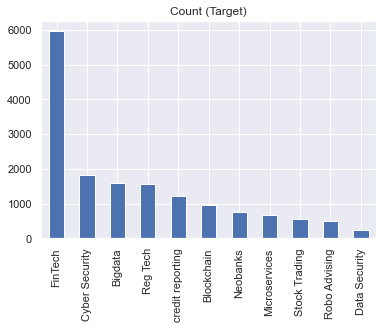

In [25]:
y_train.value_counts().plot(kind='bar', title='Count (Target)')

In [26]:
y_test.value_counts()

FinTech             2595
Cyber Security       809
Bigdata              670
Reg Tech             648
credit reporting     517
Blockchain           403
Microservices        310
Neobanks             308
Robo Advising        233
Stock Trading        226
Data Security         92
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

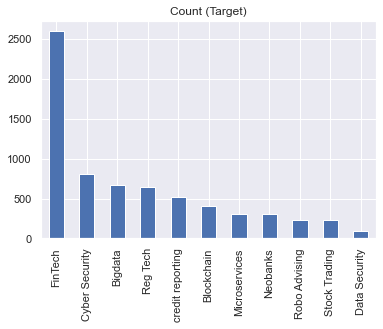

In [27]:
y_test.value_counts().plot(kind='bar', title='Count (Target)')

The data looks imbalanced

#### Word Vectorization

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

Using "vectorizer.fit_transform()" training data is converted into Document transform matrix.

document transform matrix converts words in the sentence to features 
with their value showing symantic importance of the words
 
 values=(TF*IDF)

In [29]:
vectorizer=TfidfVectorizer(stop_words='english') #ingnoring common english pronous using stop_words='english'

In [30]:
X_train_DTmatrix=vectorizer.fit_transform(X_train)
X_test_DTmatrix=vectorizer.transform(X_test)

#### Oversampling

Note: we have finally used SMOTE after comparing its reults with random oversampling

##### 1. Random Oversampling 

In [95]:
from imblearn.over_sampling import RandomOverSampler

Using "RandomOversampler()" for oversampling the classes with minimum occurence frequrncy

In [96]:
ros = RandomOverSampler()

In [97]:
X_train_DTmatrix, y_train = ros.fit_resample(X_train_DTmatrix, y_train)  # Oversampling training data

In [98]:
y_train.value_counts()

Microservices       5998
Data Security       5998
Reg Tech            5998
FinTech             5998
Robo Advising       5998
Cyber Security      5998
Stock Trading       5998
Bigdata             5998
credit reporting    5998
Neobanks            5998
Blockchain          5998
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

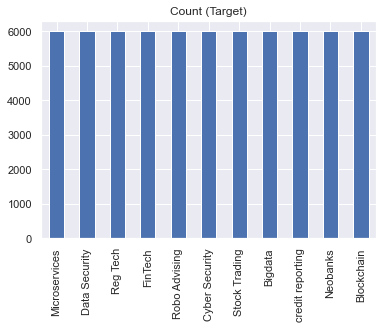

In [99]:
y_train.value_counts().plot(kind='bar', title='Count (Target)')

In [100]:
X_test_DTmatrix, y_test = ros.fit_resample(X_test_DTmatrix, y_test)   #Oversampling test data

In [101]:
y_test.value_counts()

Bigdata             2553
Microservices       2553
Data Security       2553
Reg Tech            2553
credit reporting    2553
FinTech             2553
Robo Advising       2553
Cyber Security      2553
Stock Trading       2553
Neobanks            2553
Blockchain          2553
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Count (Target)'}>

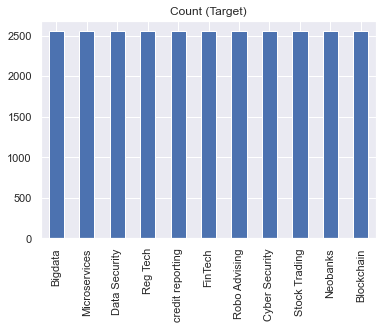

In [102]:
y_test.value_counts().plot(kind='bar', title='Count (Target)')

##### 2. Oversampling by SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
oversample = SMOTE()

In [33]:
X_train_DTmatrix, y_train = oversample.fit_resample(X_train_DTmatrix, y_train)  #oversamplong train data by SMOTE

In [34]:
y_train.value_counts()

Neobanks            5956
Stock Trading       5956
FinTech             5956
Bigdata             5956
Robo Advising       5956
Cyber Security      5956
Microservices       5956
Reg Tech            5956
Data Security       5956
Blockchain          5956
credit reporting    5956
Name: Target, dtype: int64

In [35]:
X_test_DTmatrix, y_test = oversample.fit_resample(X_test_DTmatrix, y_test)   #Oversampling test data by SMOTE

In [36]:
y_test.value_counts()

Neobanks            2595
Reg Tech            2595
Stock Trading       2595
Data Security       2595
FinTech             2595
Bigdata             2595
Robo Advising       2595
Cyber Security      2595
Blockchain          2595
Microservices       2595
credit reporting    2595
Name: Target, dtype: int64

#### 1. Naive Bayes Classifier

In [37]:
from sklearn.naive_bayes import MultinomialNB

As of now, we have completed pre-processing of the data.

Now we will train the model on processed data using Naive Bayes's classifier.
Naive Baye's classifier is widely used for text classification problems.
Naive Baye's classifier predicts based on occurance of the word in a sentence. 
It assumes that every feature(in our case occurance of particular words) is independent of other.

But this classifier algorithm fails when any new word comes as an input, beacuse it predicts probability of that word as zero.
And hence every feature being independent the output probability is zero.

In [38]:
print(X_train_DTmatrix.shape)
print(y_train.shape)

(65516, 6495)
(65516,)


In [39]:
#training model on processed train data
model=MultinomialNB(alpha=0.5)
model.fit(X_train_DTmatrix, y_train)

MultinomialNB(alpha=0.5)

In [40]:
#predicting dependent variable (particularly speaking, y_test)
predicted_y=model.predict(X_test_DTmatrix)

In [41]:
#predicting dependent variable on training data
predicted_y_train=model.predict(X_train_DTmatrix)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

Evaluating the classifier model by it's training and teasting accuracy and the confusion matrix. 

In [43]:
print("The training accuracy of Naive Bayes is {}".format(accuracy_score(y_train,predicted_y_train)))

The training accuracy of Naive Bayes is 0.833674216985164


In [44]:
print("The test accuracy of naive Bayes is {}".format(accuracy_score(y_test, predicted_y)))

The test accuracy of naive Bayes is 0.6237519705727799


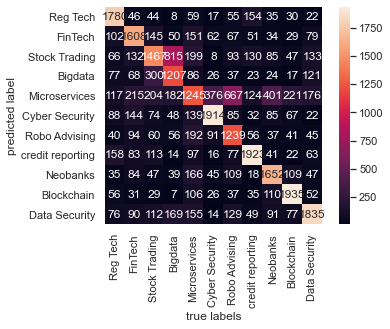

In [45]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_y)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_train.unique(),yticklabels=y_train.unique())
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [46]:
f1_score(y_test, predicted_y, average='macro')

0.6296377522113865

### -----------------------------------------------------------------------------------------------------------------------------------------------------

Naive Bayes performance improved after oversampling

Now we will try to build the model using SVM.
SVM is also one algorithm which is popularly used for text classification

In [47]:
from sklearn import svm

In [48]:
# Classifier - Algorithm - SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [49]:
# fit the training dataset on the classifier
SVM.fit(X_train_DTmatrix,y_train)

SVC(gamma='auto', kernel='linear')

In [50]:
# predict the labels on test dataset
predictions_SVM = SVM.predict(X_test_DTmatrix)

In [51]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test))

SVM Accuracy Score ->  0.5427220178665265


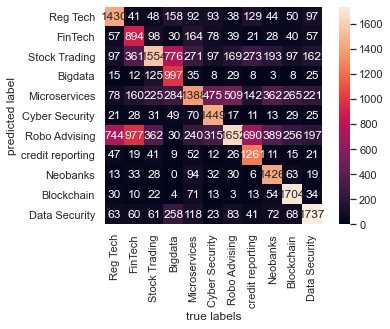

In [52]:
# plot the confusion matrix
mat = confusion_matrix(y_test, predictions_SVM)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_train.unique(),yticklabels=y_train.unique())
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()


In [53]:
f1_score(y_test, predictions_SVM, average='macro')

0.5616287978442748

### --------------------------------------------------------------------------------------------------------------------------------------------------------

SVM performance was better before oversampling but reduced after oversampling,

SVM test accuracy (without oversampling) = 0.622

SVM test accuracy (with random oversampling)    = 0.5498

SVM test accuracy (with SMOTE sampling)  = 0.5427


This may be due to, after oversampling the model trained on it will be baised to the oversampled class.